## Generate supplementary figure

### Performance for single-class models

- Panel A: Single class model precision recall curves for all 15 phenotypes
- Panel B: F1 scores

In [1]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(patchwork))

# Load variables important for plotting (e.g., themes, phenotypes, etc.)
source("themes.r")

Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘patchwork’ was built under R version 4.2.3”


In [2]:
figure_dir <- "figures"
output_sup_fig_scm <- file.path(figure_dir, "supplementary", "supplementary_singleclassmodel_evaluations.png")
output_sup_fig_loio <- file.path(figure_dir, "supplementary", "supplementary_leaveoneimageout_evaluations.png")

## First supplementary figure - Generate precision recall curves

In [3]:
# Load data
results_dir <- file.path(
    "..", "3.evaluate_model", "evaluations", "precision_recall_curves"
)
results_file <- file.path(results_dir, "compiled_SCM_PR_curves.tsv")

pr_df <- readr::read_tsv(
    results_file,
    col_types = readr::cols(
        .default = "d",
        "Model_Class" = "c",
        "data_split" = "c",
        "shuffled" = "c",
        "feature_type" = "c"
    )
) %>%
    dplyr::select(!`...1`) %>%
    dplyr::mutate(feature_type_with_data_split = paste0(feature_type, data_split)) %>%
    dplyr::filter(!stringr::str_detect(Model_Class, "Negative"))
    

print(dim(pr_df))
head(pr_df)

New names:
• `` -> `...1`


[1] 67884     8


Model_Class,PR_Threshold,Precision,Recall,data_split,shuffled,feature_type,feature_type_with_data_split
<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
Large,0.02271704,0.5000000,1,train,False,CP,CPtrain
Large,0.03024293,0.5037594,1,train,False,CP,CPtrain
Large,0.03550188,0.5075758,1,train,False,CP,CPtrain
Large,0.04414312,0.5114504,1,train,False,CP,CPtrain
Large,0.04427763,0.5153846,1,train,False,CP,CPtrain
Large,0.04467844,0.5193798,1,train,False,CP,CPtrain


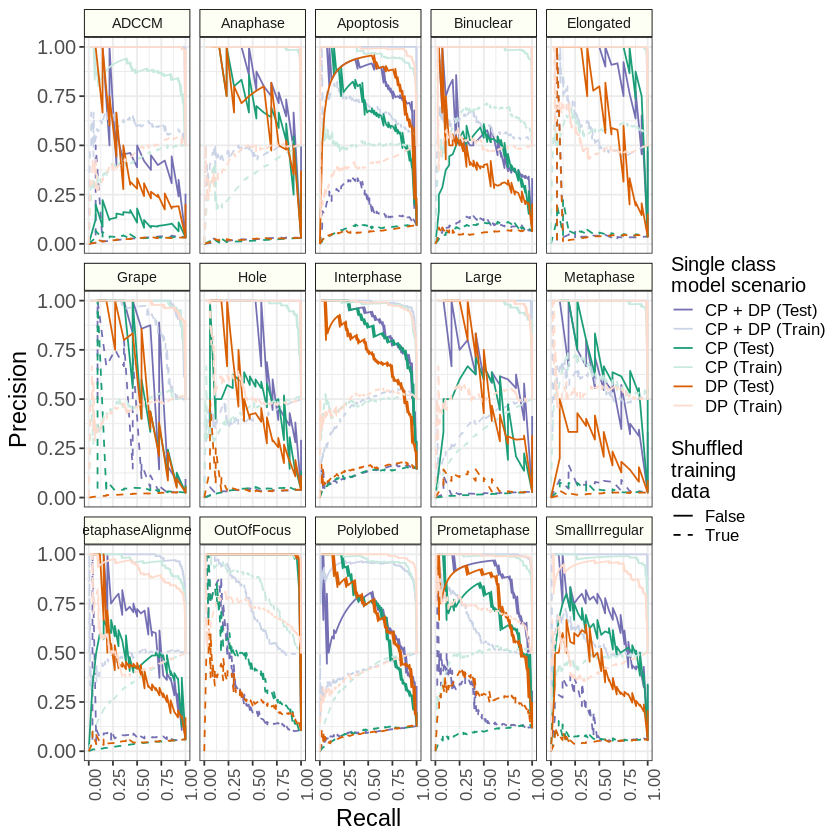

In [4]:
pr_curve_gg <- (
    ggplot(pr_df, aes(x = Recall, y = Precision))
    + geom_line(aes(color = feature_type_with_data_split, linetype = shuffled))
    + facet_wrap("~Model_Class", nrow = 3)
    + theme_bw()
    + xlab("Recall")
    + ylab("Precision")
    + scale_color_manual(
        name = "Single class\nmodel scenario",
        labels = feature_type_with_data_split_labels,
        values = feature_type_with_data_split_colors
    )
    + scale_linetype_manual(
        name = "Shuffled\ntraining\ndata",
        labels = shuffled_labels,
        values = shuffled_linetypes
    )
    + guides(
        color = guide_legend(order = 1),
        linetype = guide_legend(order = 2),
    )
    + phenotypic_ggplot_theme
    # Decrease spacing in legend
    + theme(
        legend.spacing.y = unit(0.1, "cm"),
        legend.box.spacing = unit(0.2, "cm"),
        legend.key.size = unit(0.7, "lines"),
        legend.key.width = unit(1, "lines"),
        axis.text.x = element_text(angle = 90),
        strip.text = element_text(size = 8.5),
        axis.text.y = element_text(size = 12),
        axis.title = element_text(size = 14)
    )
)

pr_curve_gg

## F1 score summary

In [5]:
# Load data
results_dir <- file.path(
    "..", "3.evaluate_model", "evaluations", "F1_scores"
)
results_file <- file.path(results_dir, "compiled_SCM_F1_scorescoress.tsv")

f1_score_df <- readr::read_tsv(
    results_file,
    col_types = readr::cols(
        .default = "d",
        "Phenotypic_Class" = "c",
        "data_split" = "c",
        "shuffled" = "c",
        "feature_type" = "c"
    )
) %>%
    dplyr::select(!`...1`) %>%
    dplyr::mutate(feature_type_with_data_split = paste0(feature_type, data_split)) %>%
    dplyr::filter(data_split == "test") %>%
    dplyr::filter(!stringr::str_detect(Phenotypic_Class, "Negative")) %>%
    dplyr::filter(Phenotypic_Class != "Weighted")

f1_score_df$Phenotypic_Class <-
    factor(f1_score_df$Phenotypic_Class, levels = rev(unique(f1_score_df$Phenotypic_Class)))

print(dim(f1_score_df))
head(f1_score_df)

New names:
• `` -> `...1`


[1] 90  6


Phenotypic_Class,F1_Score,data_split,shuffled,feature_type,feature_type_with_data_split
<fct>,<dbl>,<chr>,<chr>,<chr>,<chr>
Large,0.3437500,test,False,CP,CPtest
Prometaphase,0.6071429,test,False,CP,CPtest
Grape,0.1869159,test,False,CP,CPtest
Interphase,0.7272727,test,False,CP,CPtest
Apoptosis,0.5594406,test,False,CP,CPtest
ADCCM,0.1575758,test,False,CP,CPtest


In [6]:
# How many of the phenotypic classes are certain feature types the best?
top_scores_df <- f1_score_df %>%
    dplyr::arrange(desc(F1_Score)) %>%
    dplyr::group_by(Phenotypic_Class) %>%
    dplyr::slice(1)

print(table(top_scores_df$feature_type_with_data_split))

top_scores_df


CP_and_DPtest        CPtest        DPtest 
            7             7             1 


Phenotypic_Class,F1_Score,data_split,shuffled,feature_type,feature_type_with_data_split
<fct>,<dbl>,<chr>,<chr>,<chr>,<chr>
OutOfFocus,0.9484536,test,False,DP,DPtest
Elongated,0.6530612,test,False,CP,CPtest
MetaphaseAlignment,0.3676471,test,False,CP,CPtest
Anaphase,0.2795699,test,False,CP,CPtest
Hole,0.4000000,test,False,CP,CPtest
Binuclear,0.4786325,test,False,CP_and_DP,CP_and_DPtest
Metaphase,0.2650602,test,False,CP_and_DP,CP_and_DPtest
Polylobed,0.6357616,test,False,CP_and_DP,CP_and_DPtest
SmallIrregular,0.4901961,test,False,CP,CPtest


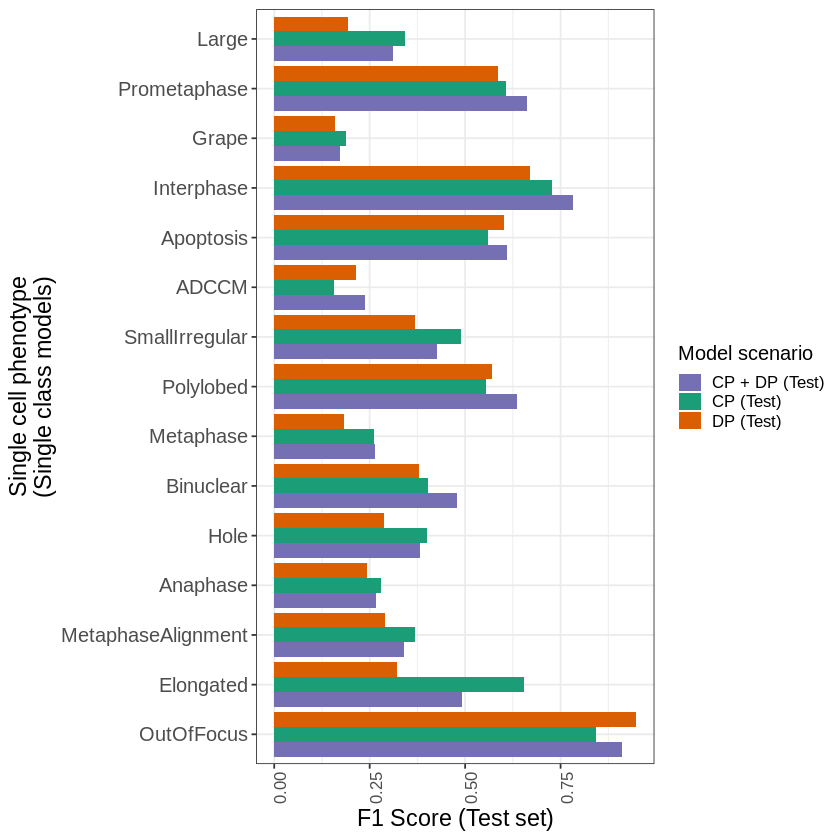

In [7]:
f1_score_gg <- (
    ggplot(f1_score_df, aes(x = Phenotypic_Class, y = F1_Score))
    + geom_bar(aes(fill = feature_type_with_data_split), stat = "identity", position = "dodge")
    + theme_bw()
    + xlab("Single cell phenotype\n(Single class models)")
    + ylab("F1 Score (Test set)")
    + scale_fill_manual(
        name = "Model scenario",
        labels = feature_type_with_data_split_labels,
        values = feature_type_with_data_split_colors
    )
    + phenotypic_ggplot_theme
    # Decrease spacing in legend and rotate textfigure
    + theme(
        legend.spacing.y = unit(0.2, "cm"),
        legend.box.spacing = unit(0.3, "cm"),
        legend.key.size = unit(0.8, "lines"),
        legend.key.width = unit(1, "lines"),
        axis.text.x = element_text(angle = 90),
        axis.text.y = element_text(size = 12),
        axis.title = element_text(size = 14)
    )
    + coord_flip()
)

f1_score_gg

## Compile Supplementary Figure

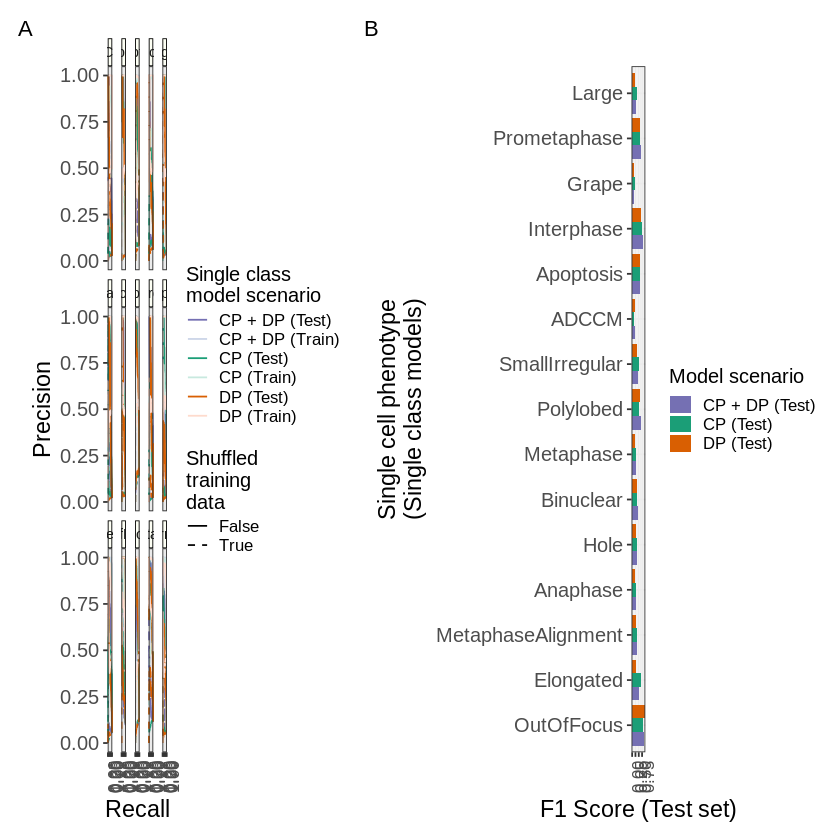

In [8]:
sup_fig <- (
    pr_curve_gg | 
    f1_score_gg
) + plot_layout(widths = c(3, 0.7)) + plot_annotation(tag_levels = "A")

ggsave(output_sup_fig_scm, dpi = 500, height = 6, width = 15)

sup_fig